In [1]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


NameError: name 'df' is not defined

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('Dataset_ecommerce.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset_ecommerce.xlsx'

In [5]:
FileNotFoundError: [Errno 2] No such file or directory: 'Dataset_ecommerce.xlsx'

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3187001060.py, line 1)

In [6]:
import os
print(os.getcwd())


C:\Users\HP\Cohort-Analysis-With-Git


In [7]:
df = pd.read_excel('your_actual_filename.xlsx', engine='openpyxl')


FileNotFoundError: [Errno 2] No such file or directory: 'your_actual_filename.xlsx'

In [8]:
df = pd.read_excel('your_actual_filename.xlsx', engine='openpyxl')



FileNotFoundError: [Errno 2] No such file or directory: 'your_actual_filename.xlsx'

In [9]:
df = pd.read_excel('your_actual_filename.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'your_actual_filename.xlsx'

In [10]:
df = pd.read_excel('Cohort-Analysis-With-Git.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'Cohort-Analysis-With-Git.xlsx'

In [11]:
df = pd.read_excel('C:\Users\HP\Cohort-Analysis-With-Git')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3011583544.py, line 1)

In [12]:
df = pd.read_excel('Cohort-Analysis-With-Git')

FileNotFoundError: [Errno 2] No such file or directory: 'Cohort-Analysis-With-Git'

In [13]:
df = pd.read_excel('Cohort-Analysis-With-Git.xlsx', engine='openpyxl')


FileNotFoundError: [Errno 2] No such file or directory: 'Cohort-Analysis-With-Git.xlsx'

In [14]:
df = pd.read_excel('Cohort-Analysis-With-Git.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'Cohort-Analysis-With-Git.xlsx'

In [15]:
 df = pd.read_excel('Cohort-Analysis-With-Git.xlsx' df.head()

SyntaxError: '(' was never closed (2514977703.py, line 1)

In [16]:
import os
print(os.getcwd())


C:\Users\HP\Cohort-Analysis-With-Git


In [17]:
 df = pd.read_excel('Cohort-Analysis-With-Git.xlsx' df.head()

SyntaxError: '(' was never closed (2514977703.py, line 1)

In [18]:
 df = pd.read_excel('Cohort-Analysis-With-Git\Dataset_ecommerce.xlsx' df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_19884\3244460011.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel('Cohort-Analysis-With-Git\Dataset_ecommerce.xlsx' df.head()


SyntaxError: '(' was never closed (3244460011.py, line 1)

In [19]:
df = pd.read_excel(r'Cohort-Analysis-With-Git\Dataset_ecommerce.xlsx', engine='openpyxl')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Cohort-Analysis-With-Git\\Dataset_ecommerce.xlsx'

In [20]:
df = pd.read_excel('Cohort-Analysis-With-Git\\Dataset_ecommerce.xlsx', engine='openpyxl')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Cohort-Analysis-With-Git\\Dataset_ecommerce.xlsx'

In [21]:
df = pd.read_excel(r'C:\Users\HP\Cohort-Analysis-With-Git\Dataset_ecommerce.xlsx', engine='openpyxl')
df.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [22]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


In [23]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

df['CohortIndex'] = (invoice_year - cohort_year) * 12 + (invoice_month - cohort_month)


In [24]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

df['CohortIndex'] = (invoice_year - cohort_year) * 12 + (invoice_month - cohort_month)


In [25]:
# Count unique customers per CohortMonth and CohortIndex
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot into a retention matrix
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Count unique customers per CohortMonth and CohortIndex
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot into a retention matrix
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


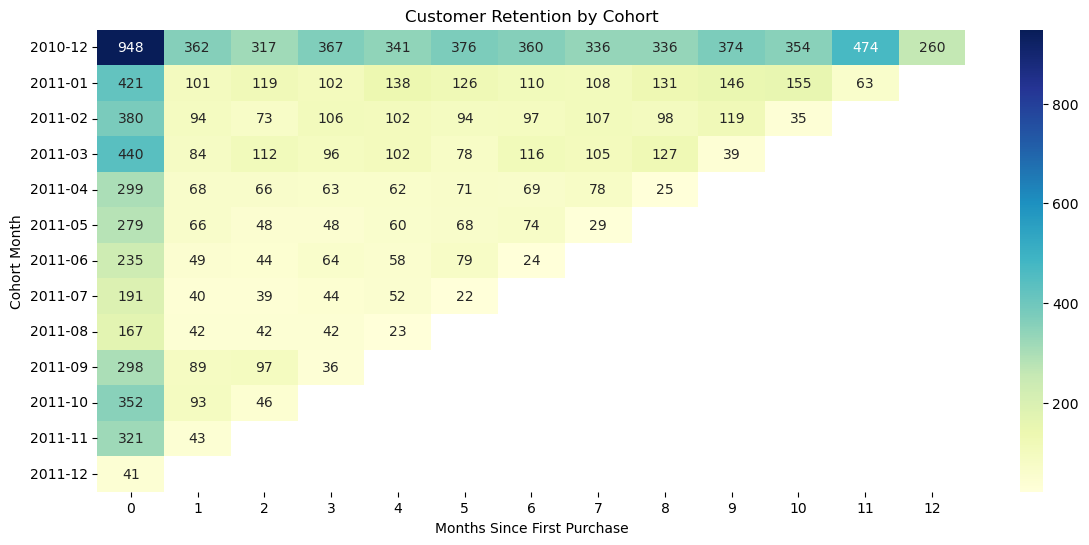

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(cohort_counts, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Customer Retention by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()


In [28]:
# Divide all values in each row by the first column (month 0)
cohort_sizes = cohort_counts.iloc[:, 0]  # Initial customers per cohort
retention = cohort_counts.divide(cohort_sizes, axis=0).round(3)
retention


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


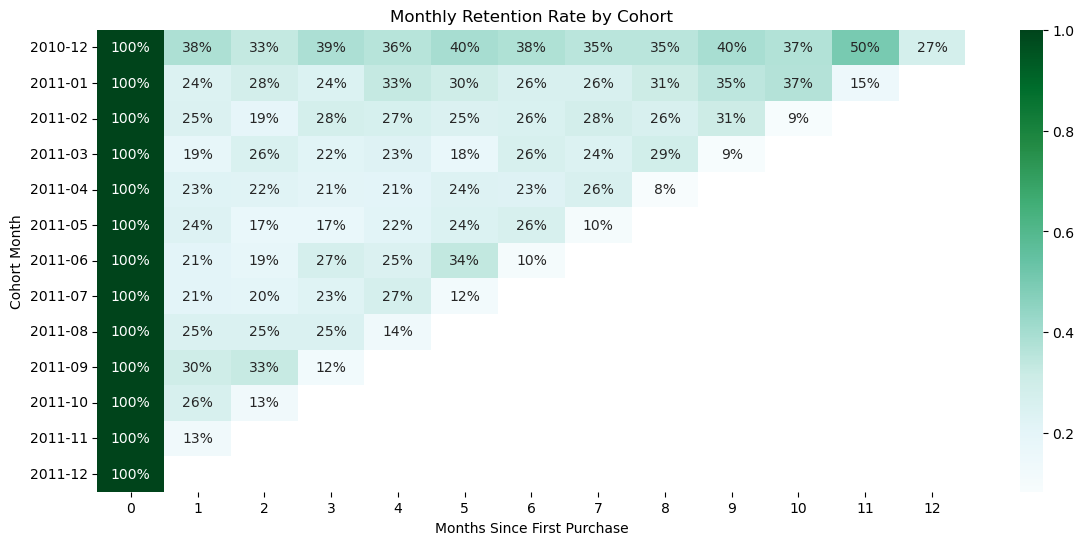

In [29]:
plt.figure(figsize=(14, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='BuGn')

plt.title('Monthly Retention Rate by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()


In [30]:
# Last transaction date in dataset
last_date = df['InvoiceDate'].max()

# Recency in days for each customer
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['RecencyDays'] = (last_date - recency_df['InvoiceDate']).dt.days

# Flag churned customers
recency_df['Churned'] = recency_df['RecencyDays'] > 90

recency_df.head()


,CustomerID,InvoiceDate,RecencyDays,Churned
0,12346.0,2011-01-18 10:17:00,325,True
1,12347.0,2011-12-07 15:52:00,1,False
2,12348.0,2011-09-25 13:13:00,74,False
3,12349.0,2011-11-21 09:51:00,18,False
4,12350.0,2011-02-02 16:01:00,309,True


In [31]:
# Merge churn data into main DataFrame
df = df.merge(recency_df[['CustomerID', 'Churned']], on='CustomerID', how='left')


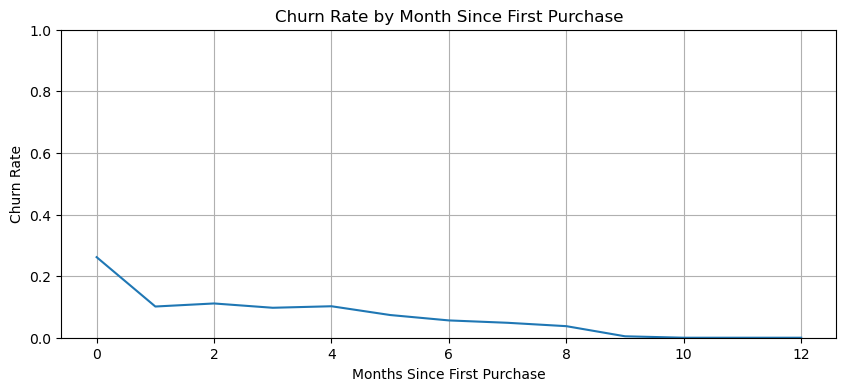

In [32]:
churn_by_index = df.groupby(['CohortIndex'])['Churned'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=churn_by_index, x='CohortIndex', y='Churned')
plt.title('Churn Rate by Month Since First Purchase')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [33]:
# Set reference date as 1 day after the last invoice
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


KeyError: "Column(s) ['TotalPrice'] do not exist"

In [34]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [35]:
# Set reference date as 1 day after the last invoice
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                         # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,5342.40
1,12347.0,2,7,431501.00
2,12348.0,75,4,82378.47
3,12349.0,19,1,176075.12
4,12350.0,310,1,48173.37


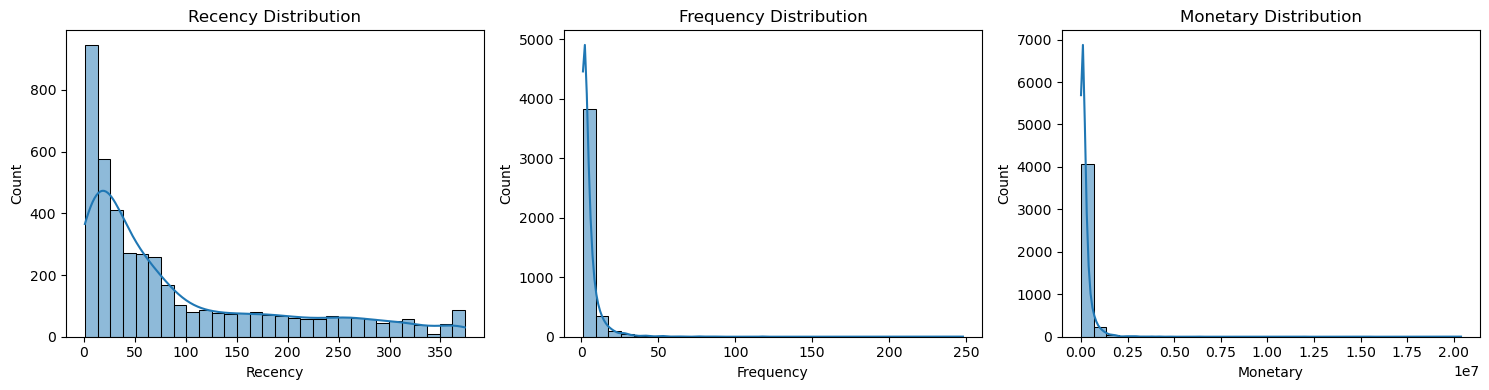

In [36]:
plt.figure(figsize=(15, 4))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler

# Keep a copy of original RFM
rfm_raw = rfm.copy()

# Select RFM columns to scale
rfm_model = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale using StandardScaler (mean=0, std=1)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_model)

# Convert back to DataFrame for easy reading
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled.head()


,Recency,Frequency,Monetary
0,2.322023,-0.329362,-0.390228
1,-0.893733,0.206102,0.326737
2,-0.169196,-0.115176,-0.260623
3,-0.725005,-0.436455,-0.102989
4,2.163220,-0.436455,-0.318169


In [38]:
# Average RFM values per cluster
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).round(1)

cluster_profile


KeyError: 'Cluster'

In [39]:
from sklearn.cluster import KMeans

# Re-run KMeans on scaled data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

# Add the cluster back to both scaled and original RFM
rfm_scaled['Cluster'] = clusters
rfm['Cluster'] = clusters


In [40]:
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).round(1)

cluster_profile


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


In [41]:
!pip install lifetimes


   ---------------------------------------- 0.0/584.2 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/584.2 kB ? eta -:--:--
   ---------------------------------------- 584.2/584.2 kB 5.1 MB/s eta 0:00:00


In [42]:
from lifetimes import BetaGeoFitter
from lifetimes.utils import summary_data_from_transaction_data


In [43]:
# Prepare the data using the lifetimes utility
summary = summary_data_from_transaction_data(
    df, 
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    monetary_value_col='TotalPrice',
    observation_period_end=df['InvoiceDate'].max()
)

summary.head()


,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,59683.226667
12348.0,3.0,283.0,358.0,12374.866667
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [44]:
# Create and fit the BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(
    frequency=summary['frequency'], 
    recency=summary['recency'], 
    T=summary['T']
)


<lifetimes.BetaGeoFitter: fitted with 4372 subjects, a: 0.02, alpha: 55.33, b: 0.41, r: 0.84>

In [45]:
# Predict future purchases for the next 30 days
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30, 
    summary['frequency'], 
    summary['recency'], 
    summary['T']
)

summary[['frequency', 'recency', 'T', 'predicted_purchases']].head()


,frequency,recency,T,predicted_purchases
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.065963
12347.0,6.0,365.0,367.0,0.483666
12348.0,3.0,283.0,358.0,0.273751
12349.0,0.0,0.0,18.0,0.338635
12350.0,0.0,0.0,310.0,0.068663


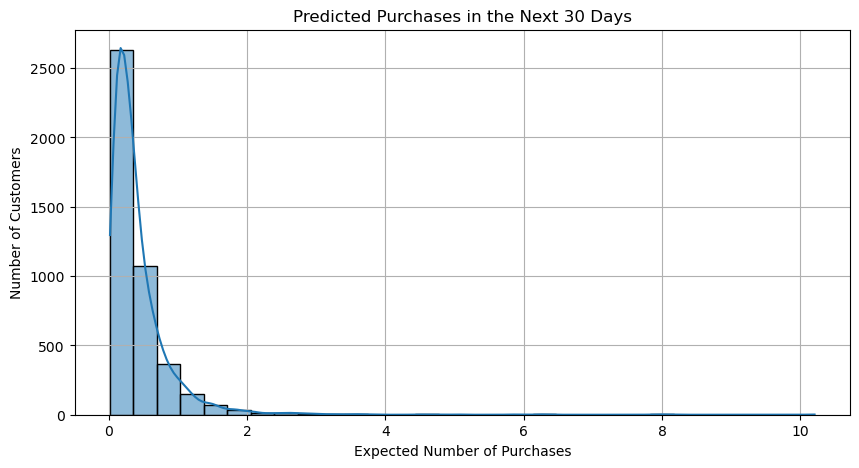

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(summary['predicted_purchases'], bins=30, kde=True)
plt.title('Predicted Purchases in the Next 30 Days')
plt.xlabel('Expected Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


In [47]:
# Sort customers by most likely to purchase again
top_customers = summary.sort_values('predicted_purchases', ascending=False).head(10)
top_customers


,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14911.0,145.0,372.0,373.0,105467.949724,10.205880
12748.0,114.0,373.0,373.0,104491.125439,8.036608
17841.0,112.0,372.0,373.0,180588.494732,7.896219
15311.0,90.0,373.0,373.0,68738.950333,6.356753
14606.0,88.0,372.0,373.0,80126.395682,6.216457
13089.0,82.0,367.0,369.0,57676.708171,5.850763
12971.0,71.0,369.0,372.0,10398.795775,5.037736
16422.0,66.0,352.0,369.0,14668.429242,4.701534
14527.0,63.0,371.0,373.0,41942.050476,4.466444


In [48]:
# Merge churn flag into RFM
rfm_model = rfm.merge(recency_df[['CustomerID', 'Churned']], on='CustomerID', how='left')

# Drop CustomerID, keep features + label
X = rfm_model[['Recency', 'Frequency', 'Monetary']]
y = rfm_model['Churned']


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       877
        True       1.00      1.00      1.00       435

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



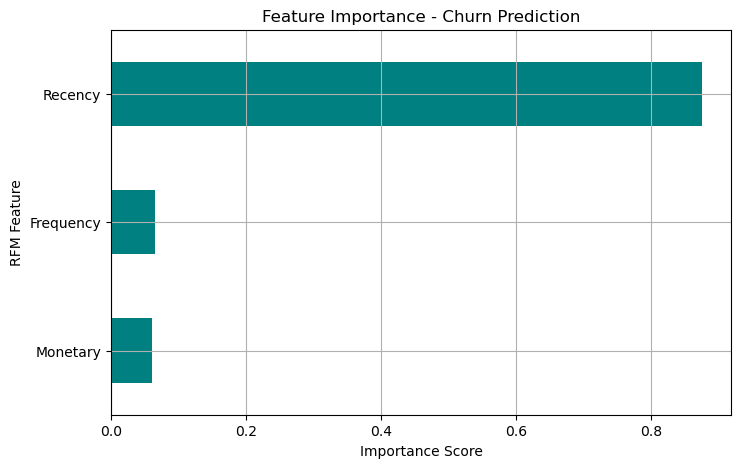

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 5))
feature_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance - Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('RFM Feature')
plt.grid(True)
plt.show()


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [53]:
# Convert to integers
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_int, y_pred_int)
rmse = np.sqrt(mean_squared_error(y_test_int, y_pred_int))

print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))


Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0
